In [4]:
!pip install pandas openpyxl

In [778]:
# 라이브러리 임포트
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import statsmodels.formula.api as smf
import statsmodels.api as sm

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')  # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3


# 엑셀 파일 경로
file_path = r"C:\Users\MINSEOK\Downloads\국민건강영양조사_(2010-2023)\hn23_all.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

In [779]:
df

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_FOLATE,N_VITC,LF_SECUR_Y,LF_BUYER,LF_SAFE
0,2024.12.10.,YA84208301,YA842083,2023,1,1,2,YA84,1,75,...,2704.555129,22.304061,0.689636,0.911565,4.519287,108.528994,29.390490,1.0,1.0,1.0
1,2024.12.10.,YA84208302,YA842083,2023,1,1,2,YA84,2,70,...,1190.505880,44.455061,1.010501,0.839130,6.333379,52.454348,15.650710,1.0,1.0,1.0
2,2024.12.10.,YA84212402,YA842124,2023,1,1,2,YA84,2,42,...,6752.011600,364.273465,1.839332,3.257774,24.363661,231.528144,35.242941,1.0,1.0,2.0
3,2024.12.10.,YA84212404,YA842124,2023,1,1,2,YA84,2,9,...,2213.362823,893.834459,1.873845,2.962366,22.194257,374.230895,69.595766,1.0,1.0,2.0
4,2024.12.10.,YA84242702,YA842427,2023,1,1,2,YA84,1,43,...,2136.906180,309.283062,1.086500,2.021552,10.360013,366.058694,65.171145,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,2024.12.10.,YR62368101,YR623681,2023,8,2,1,YR62,1,80,...,2158.199974,9.514286,0.652938,1.151994,12.808814,337.352062,26.125158,1.0,1.0,1.0
6925,2024.12.10.,YR62368102,YR623681,2023,8,2,1,YR62,2,78,...,2217.551546,42.535857,1.310568,1.151318,14.870108,184.289904,17.537722,1.0,1.0,1.0
6926,2024.12.10.,YR62370201,YR623702,2023,8,2,1,YR62,2,61,...,949.749369,219.443462,0.742543,1.677973,10.877976,417.792346,20.586685,1.0,1.0,1.0
6927,2024.12.10.,YR62394401,YR623944,2023,8,2,1,YR62,1,57,...,4495.650299,193.857866,0.937317,1.827701,7.649848,433.988024,53.146545,1.0,2.0,1.0


In [780]:
selected_cols = ['ID', 'sex', 'age', 'BE3_73','BE3_74', 'BE3_77','BE3_78', 'BE3_83','BE3_84', 'BE3_87','BE3_88', 'pa_aerobic','HE_obe']
df_selected = df[selected_cols]

In [781]:
df_selected.columns = df_selected.columns.str.strip()  # 공백 제거

In [782]:
#1: 남성, 2: 여성
df_selected = df_selected.replace({'sex': 1}, 'M')
df_selected = df_selected.replace({'sex': 2}, 'F')

In [783]:
df_selected = df_selected.rename(columns={
    'BE3_73': 'vigorous_work(h)',
    'BE3_74': 'vigorous_work(m)',
    'BE3_77': 'vigorous_leisure(h)',
    'BE3_78': 'vigorous_leisure(m)',
    'BE3_83': 'moderate_work(h)',
    'BE3_84': 'moderate_work(m)',
    'BE3_87': 'moderate_leisure(h)',
    'BE3_88': 'moderate_leisure(m)',
    'pa_aerobic': 'aerobic',
    'HE_obe': 'obesity'
})

In [784]:
conditions = [
    (df_selected['obesity'] == 1),
    (df_selected['obesity'].isin([2, 3])),
    (df_selected['obesity'].isin([4, 5, 6]))
]
choices = ['저체중', '정상', '비만']

df_selected['isObesity'] = np.select(conditions, choices, default='NaN')

In [785]:
bins = [0, 19, 29, 39, 49, 59, 69 ,80]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70+']
df_selected['age_group'] = pd.cut(df_selected.age, bins=bins, labels = age_labels)

In [786]:
#결측치(NaN, 무응답) 제거
df_selected = df_selected.dropna()

cols_toCheck = ['vigorous_work(h)', 'vigorous_work(m)', 'vigorous_leisure(h)', 'vigorous_leisure(m)', 'moderate_work(h)', 'moderate_work(m)', 'moderate_leisure(h)', 'moderate_leisure(m)']
df_selected = df_selected[~df_selected[cols_toCheck].isin([99]).any(axis=1)]

In [787]:
#비해당은 0시간으로 기록
df_selected[cols_toCheck] = df_selected[cols_toCheck].replace(88, 0)

In [788]:
vigorous_work = round(df_selected['vigorous_work(h)'] + df_selected['vigorous_work(m)'] / 60, 1)
vigorous_leisure = round(df_selected['vigorous_leisure(h)'] + df_selected['vigorous_leisure(m)'] / 60, 1)
moderate_work = round(df_selected['moderate_work(h)'] + df_selected['moderate_work(m)'] / 60, 1)
moderate_leisure = round(df_selected['moderate_leisure(h)'] + df_selected['moderate_leisure(m)'] / 60, 1)

df_selected['vigorous'] = vigorous_work + vigorous_leisure
df_selected['moderate'] = moderate_work + moderate_leisure

In [789]:
#vigorous + moderate 계산해서 운동 시간 그룹화(범주형), 연속형 변수

In [790]:
# df_selected = df_selected[~df_selected['vigorous_leisure'].isin([88])] #651 rows × 11 columns

In [791]:
# df_selected = df_selected[~df_selected['moderate_leisure'].isin([88])] #1752 rows × 11 columns

In [792]:
df_selected

,ID,sex,age,vigorous_work(h),vigorous_work(m),vigorous_leisure(h),vigorous_leisure(m),moderate_work(h),moderate_work(m),moderate_leisure(h),moderate_leisure(m),aerobic,obesity,isObesity,age_group,vigorous,moderate
0,YA84208301,M,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,정상,70+,0.0,0.0
1,YA84208302,F,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,저체중,70+,0.0,0.0
2,YA84212402,F,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,정상,40s,0.0,0.0
4,YA84242702,M,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,정상,40s,0.0,0.0
8,YA84382301,M,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,정상,40s,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,YR62368101,M,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,정상,70+,0.0,0.0
6925,YR62368102,F,78,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,1.0,4.0,비만,70+,0.0,1.5
6926,YR62370201,F,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,2.0,정상,60s,0.0,0.3
6927,YR62394401,M,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,3.0,정상,50s,0.0,0.3


In [793]:
df_selected.to_csv('df.csv', index = False, encoding = 'cp949')

---

### 유산소 신체활동 실천율 - 체중 분포

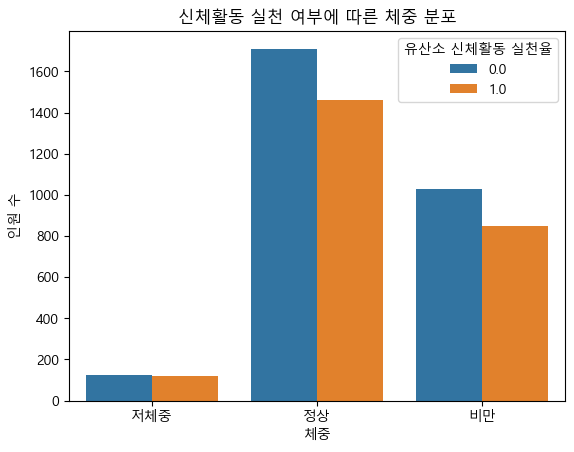

In [16]:
sns.countplot(data=df_selected, x='체중', hue='유산소 신체활동 실천율', order = ['저체중', '정상', '비만'])
plt.title('신체활동 실천 여부에 따른 체중 분포')
plt.ylabel('인원 수')
plt.legend(title='유산소 신체활동 실천율')
plt.show()

유산소 신체활동 실천율	
* 0. 일주일에 중강도 신체활동을 2시간 30분 이상 또는 고강도 신체활동을 1시간 15분 이상 또는 중강도와 고강도 신체활동을 섞어서(고강도 1분은 중강도 2분) 각 활동에 상당하는 시간을 실천하지 않음
* 1. 일주일에 중강도 신체활동을 2시간 30분 이상 또는 고강도 신체활동을 1시간 15분 이상 또는 중강도와 고강도 신체활동을 섞어서(고강도 1분은 중강도 2분) 각 활동에 상당하는 시간을 실천
